<a href="https://colab.research.google.com/github/GayazSh/Bike-Sales-Analysis-Dashboard-Excel/blob/main/HEART_DISEASE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Analysis


 Load the dataset


In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
df1 = pd.read_csv('/content/in-hospital-mortality-trends-by-health-category.csv')
df2 = pd.read_csv('/content/utilization-trends-by-health-category.csv')

In [ ]:
joined_df = pd.merge(df1, df2, on='Category', how='inner')


NameError: name 'pd' is not defined

In [ ]:
print(df1.columns)
print(df2.columns)


Index(['Date', 'Category', 'Setting', 'Count'], dtype='object')
Index(['Date', 'Setting', 'Category', 'System', 'Facility Name', 'Count'], dtype='object')


https://www.kaggle.com/datasets/yassinehamdaoui1/cardiovascular-disease

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardiovascular.txt', sep=';')

DATA EXPLORATION

In [ ]:
df.head(5)

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
df.shape


(462, 11)

In [ ]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

#  printing the count of missing values for each column
print(missing_values)


ind          0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [ ]:
# Filter the dataframe to include only individuals with CHD
chd_individuals = df[df['chd'] == 1]

# print the  dataframe
print(chd_individuals)


     ind  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0      1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1      2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
3      4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4      5  134    13.60  3.50      27.78  Present     60    25.99    57.34   
7      8  114     4.08  4.59      14.60  Present     62    23.11     6.72   
..   ...  ...      ...   ...        ...      ...    ...      ...      ...   
453  455  124     1.60  7.22      39.68  Present     36    31.50     0.00   
454  456  146     0.64  4.82      28.02   Absent     60    28.11     8.23   
455  457  128     2.24  2.83      26.48   Absent     48    23.96    47.42   
458  460  182     4.20  4.41      32.10   Absent     52    28.61    18.72   
461  463  132     0.00  4.82      33.41  Present     62    14.70     0.00   

     age  chd  
0     52    1  
1     63    1  
3     58    1  
4     49   

In [ ]:
df.describe()


,ind,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
# Checking the total number of chd and no chd's
chd_counts = df['chd'].value_counts()
print(chd_counts)

0    302
1    160
Name: chd, dtype: int64


This suggests that 'chd' is a binary variable, where a value of 0 can suggest the absence of coronary heart disease, for instance, and a value of 1 could indicate the existence of coronary heart disease.

In [ ]:
#unique values in the dataset to understand the patterns
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["uniquecount"]).transpose()

,uniquecount
ind,462
sbp,62
tobacco,214
ldl,329
adiposity,408
famhist,2
typea,54
obesity,400
alcohol,249
age,49


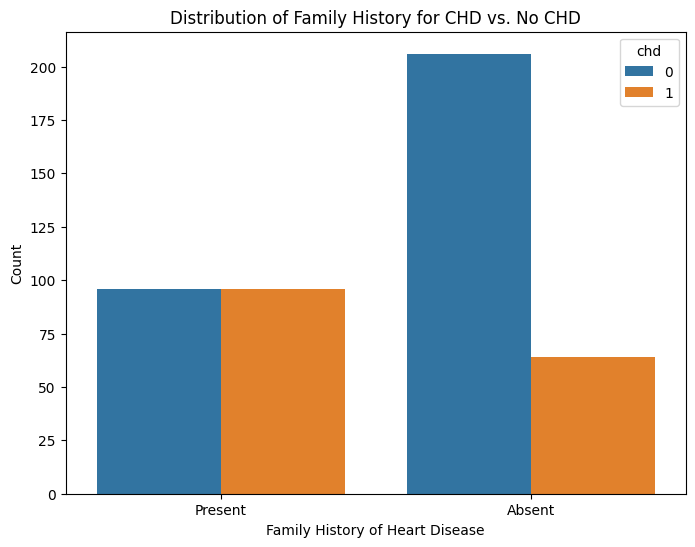

In [ ]:
#based on the unique table its indicating that they only two unique values for the familyhistory column
# comparing the CHD based on the family history
plt.figure(figsize=(8, 6))
sns.countplot(x='famhist', hue='chd', data=df)
plt.xlabel('Family History of Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Family History for CHD vs. No CHD')
plt.show()


Based on the graph It is interpretated that individuals with family history present They are having the probability of getting the risk of coronary heart disease. Where as the people with Family history absent they have very slim chances of coronary heart disease compared to the famhist presnt. But still the data doesnt prove causation.In our analysis, the presence of a family history might be a risk factor

In [ ]:
#   individuals with sbp greater than or equal to 120
high_sbp_120= df[df['sbp'] >= 120]

# print the filtered DataFrame
print("individuals with sbp >= 120:")
print(high_sbp_120)
print("number of individuals with sbp >= 120 :", len(high_sbp_120))


individuals with sbp >= 120:
     ind  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0      1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1      2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
3      4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4      5  134    13.60  3.50      27.78  Present     60    25.99    57.34   
5      6  132     6.20  6.47      36.21  Present     62    30.77    14.14   
..   ...  ...      ...   ...        ...      ...    ...      ...      ...   
455  457  128     2.24  2.83      26.48   Absent     48    23.96    47.42   
456  458  170     0.40  4.11      42.06  Present     56    33.10     2.06   
457  459  214     0.40  5.98      31.72   Absent     64    28.45     0.00   
458  460  182     4.20  4.41      32.10   Absent     52    28.61    18.72   
461  463  132     0.00  4.82      33.41  Present     62    14.70     0.00   

     age  chd  
0     52    1  
1     63    1 

In [ ]:
#  individuals with SBP >= 120 and no CHD
sbp_120_no_chd_group = df[(df['sbp'] >= 120) & (df['chd'] == 0)]

# Display the selected data
print("Individuals with SBP >= 120 and no CHD:")
print(sbp_120_no_chd_group)
print("\nCount of individuals with sbp >= 120 and no CHD :", len(sbp_120_no_chd_group))


Individuals with SBP >= 120 and no CHD:
     ind  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
5      6  132     6.20   6.47      36.21  Present     62    30.77    14.14   
6      7  142     4.05   3.38      16.20   Absent     59    20.81     2.62   
13    14  132     0.00   1.87      17.21   Absent     49    23.63     0.97   
16    17  120     7.50  15.33      22.00   Absent     60    25.31    34.49   
21    22  132     7.90   2.85      26.50  Present     51    26.16    25.71   
..   ...  ...      ...    ...        ...      ...    ...      ...      ...   
450  452  136     1.81   3.31       6.74   Absent     63    19.57    24.94   
451  453  120     0.00   2.77      13.35   Absent     67    23.37     1.03   
452  454  154     5.53   3.20      28.81  Present     61    26.15    42.79   
456  458  170     0.40   4.11      42.06  Present     56    33.10     2.06   
457  459  214     0.40   5.98      31.72   Absent     64    28.45     0.00   

     age  chd  
5     4

In [ ]:
# Filter the DataFrame for individuals with sbp greater than or equal to 120
high_sbp_df = df[df['sbp'] >= 140]

# Display the filtered DataFrame
print("individuals with sbp >= 140:")
print(high_sbp_df)
print("\nCount of individuals with sbp >= 140 :", len(high_sbp_df))


individuals with sbp >= 140:
     ind  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0      1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1      2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
3      4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
6      7  142     4.05  3.38      16.20   Absent     59    20.81     2.62   
10    11  206     6.00  2.95      32.27   Absent     72    26.81    56.06   
..   ...  ...      ...   ...        ...      ...    ...      ...      ...   
452  454  154     5.53  3.20      28.81  Present     61    26.15    42.79   
454  456  146     0.64  4.82      28.02   Absent     60    28.11     8.23   
456  458  170     0.40  4.11      42.06  Present     56    33.10     2.06   
457  459  214     0.40  5.98      31.72   Absent     64    28.45     0.00   
458  460  182     4.20  4.41      32.10   Absent     52    28.61    18.72   

     age  chd  
0     52    1  
1     63    1 

In [ ]:
# Select individuals with SBP >= 140 and no CHD
sbp_140_no_chd_group = df[(df['sbp'] >= 140) & (df['chd'] == 0)]

# Display the selected data
print("Individuals with SBP >= 140 and no CHD:")
print(sbp_140_no_chd_group)
print("\nCount of individuals with sbp >= 140  no CHD:", len(sbp_140_no_chd_group))



Individuals with SBP >= 140 and no CHD:
     ind  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
6      7  142     4.05  3.38      16.20   Absent     59    20.81     2.62   
22    23  150     0.30  6.38      33.99  Present     62    24.64     0.00   
24    25  142    18.20  4.34      24.38   Absent     61    26.19     0.00   
28    29  144     4.09  5.55      31.40  Present     60    29.43     5.55   
34    35  148     5.50  7.10      25.31   Absent     56    29.84     3.60   
..   ...  ...      ...   ...        ...      ...    ...      ...      ...   
442  444  166     6.00  8.80      37.89   Absent     39    28.70    43.20   
444  446  142     3.00  3.69      25.10   Absent     60    30.08    38.88   
452  454  154     5.53  3.20      28.81  Present     61    26.15    42.79   
456  458  170     0.40  4.11      42.06  Present     56    33.10     2.06   
457  459  214     0.40  5.98      31.72   Absent     64    28.45     0.00   

     age  chd  
6     38    0  
22 

In [ ]:
# Filter the DataFrame for individuals with sbp greater than or equal to 160 and chd
high_sbp_chd_df = df[(df['sbp'] >= 160) & (df['chd'] == 1)]

# Display the filtered DataFrame
print("Data for individuals with sbp >= 160 and chd:")
print(high_sbp_chd_df)
print("\nCount of individuals with sbp >= 160 and chd:", len(high_sbp_chd_df))


Data for individuals with sbp >= 160 and chd:
     ind  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0      1  160    12.00   5.73      23.11  Present     49    25.30    97.20   
3      4  170     7.50   6.41      38.03  Present     51    31.99    24.26   
10    11  206     6.00   2.95      32.27   Absent     72    26.81    56.06   
46    47  162     7.40   8.55      24.65  Present     64    25.71     5.86   
78    79  168     4.50   6.68      28.47   Absent     43    24.25    24.38   
107  108  170     7.60   5.50      37.83  Present     42    37.41     6.17   
111  112  168     9.00   8.53      24.48  Present     69    26.18     4.63   
113  114  174     0.00   8.46      35.10  Present     35    25.27     0.00   
140  141  160    14.00   5.90      37.12   Absent     58    33.87     3.52   
161  162  208    27.40   3.12      26.63   Absent     66    27.45    33.07   
167  168  160     1.52   8.12      29.30  Present     54    25.87    12.86   
182  183  170     

In [ ]:
# Filter the DataFrame for individuals with sbp greater than or equal to 160 and no chd
high_sbp_no_chd_df = df[(df['sbp'] >= 160) & (df['chd'] == 0)]

# Display the filtered DataFrame
print("individuals with sbp >= 160 and no chd:")
print(high_sbp_no_chd_df)
print("\nCount of individuals with sbp >= 160 and no chd:", len(high_sbp_no_chd_df))


individuals with sbp >= 160 and no chd:
     ind  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
94    95  194     1.70   6.32      33.67   Absent     47    30.16     0.19   
99   100  164    12.00   3.91      19.59   Absent     51    23.44    19.75   
101  102  166     0.07   4.03      29.29   Absent     53    28.37     0.00   
157  158  174     9.45   5.13      35.54   Absent     55    30.71    59.79   
169  170  162     5.30   7.95      33.58  Present     58    36.06     8.23   
170  171  194     2.55   6.89      33.88  Present     69    29.33     0.00   
173  174  160     0.00   2.42      34.46   Absent     48    29.83     1.03   
180  181  166     0.00   4.31      34.27   Absent     45    30.14    13.27   
197  198  162     2.92   3.63      31.33   Absent     62    31.59    18.51   
206  207  162     0.00   5.09      24.60  Present     64    26.71     3.81   
219  220  208     7.40   7.41      32.03   Absent     50    27.62     7.85   
237  238  176     5.76  

creating scatter plots to visualize the relationship between various lifestyle factors ('tobacco', 'typea', 'obesity', 'alcohol') and systolic blood pressure (SBP).

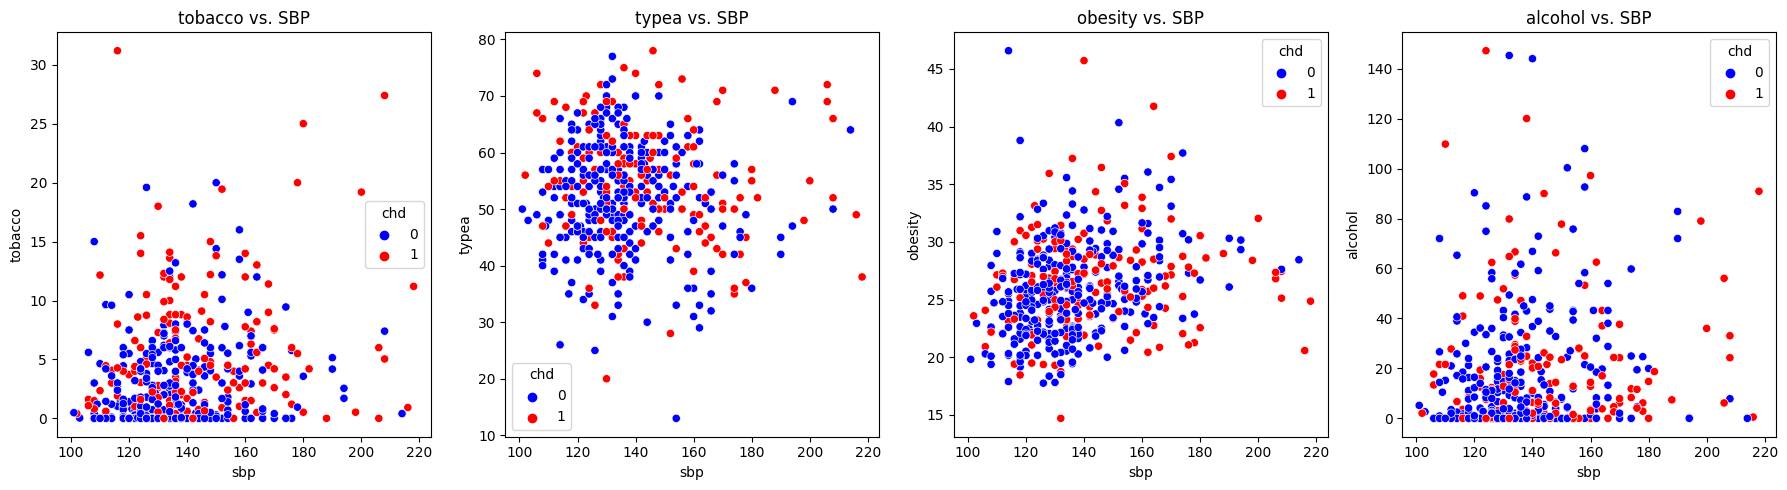

In [ ]:
# lifestyle factors to compare
lifestyle_factors = ['tobacco', 'typea', 'obesity', 'alcohol']

# Create subplots for each lifest yle factor
fig, axes = plt.subplots(nrows=1, ncols=len(lifestyle_factors), figsize=(18, 5))

# Plot scatter plots for each lifestyle factor against SBP
for i, factor in enumerate(lifestyle_factors):
    sns.scatterplot(data=df, x='sbp', y=factor, hue='chd', ax=axes[i], palette={0: 'blue', 1: 'red'})
    axes[i].set_title(f'{factor} vs. SBP')

plt.tight_layout()
plt.show()



calculating the correlation coefficients between systolic blood pressure (SBP) and the specified lifestyle factors ('tobacco', 'typea', 'obesity', 'alcohol').

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

 use of correlation serves to quantify the strength and direction of the linear relationship between systolic blood pressure (SBP) and various lifestyle factors. This analysis can provide valuable insights into how changes in these lifestyle factors might be associated with changes in systolic blood pressure

In [ ]:
columns_of_interest = ['tobacco', 'typea', 'obesity', 'alcohol', 'sbp']

#  a subset DataFrame
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print(correlation_matrix)


          tobacco     typea   obesity   alcohol       sbp
tobacco  1.000000 -0.014608  0.124529  0.200813  0.212247
typea   -0.014608  1.000000  0.074006  0.039498 -0.057454
obesity  0.124529  0.074006  1.000000  0.051620  0.238067
alcohol  0.200813  0.039498  0.051620  1.000000  0.140096
sbp      0.212247 -0.057454  0.238067  0.140096  1.000000


If a coefficient is close to 1, it indicates a strong positive correlation (as one variable increases, the other tends to increase).
If a coefficient is close to -1, it indicates a strong negative correlation (as one variable increases, the other tends to decrease).
If a coefficient is close to 0, it suggests a weak or no linear correlation.

the relationship between SBP (systolic blood pressure) and other lifestyle factors:

Tobacco (smoking): There is a positive correlation of 0.212247 between tobacco use and SBP. This suggests that individuals who smoke tend to have higher systolic blood pressure.

Type-A behavior: There is a weak negative correlation of -0.057454 between Type-A behavior and SBP. This suggests a slight tendency for individuals with Type-A behavior to have lower systolic blood pressure, although the correlation is not strong.

Obesity: There is a positive correlation of 0.238067 between obesity and SBP. This indicates that individuals with higher obesity levels tend to have higher systolic blood pressure.

Alcohol consumption: There is a positive correlation of 0.140096 between alcohol consumption and SBP. This suggests a modest association between alcohol intake and higher systolic blood pressure.

